<a href="https://colab.research.google.com/github/RutwikP/Transfer-Learning-for-Oral-Cancer-Detection-using-Microscopic-Images/blob/main/OralCancer_SmallCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBS

In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA PREPROCESSING

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.01,
    horizontal_flip = True
)


In [ ]:
import cv2
training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/og3_train_set',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)
training_set.labels

Found 968 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
training_set.class_indices

{'Cancerous': 0, 'Normal': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
valid_set = valid_datagen.flow_from_directory(
    '/content/drive/My Drive/og3_valid_set',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)
valid_set.labels

Found 124 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
valid_set.class_indices

{'Cancerous': 0, 'Normal': 1}

In [ ]:
#weight_for_cancer = (1 / 748)*(968)/2.0
#weight_for_normal = (1 / 222)*(968)/2.0

#class_weight = {0: weight_for_cancer, 1: weight_for_normal}

#print('Weight for class 0: {:.2f}'.format(weight_for_cancer))
#print('Weight for class 1: {:.2f}'.format(weight_for_normal))

Weight for class 0: 0.65
Weight for class 1: 2.18


BUILDING THE CNN

In [ ]:
model = tf.keras.models.Sequential()


ADDING 1ST CONVOLUTIONAL LAYER

In [ ]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", input_shape = [256,256,3]))


MAXPOOLING LAYER

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides= 2, padding = "valid"))

ADDING DROPOUT LAYER

In [ ]:
model.add(tf.keras.layers.Dropout(0.4))

ADDING 2nd CONV LAYER

In [ ]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))

MAXPOOL LAYER

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides= 2, padding = "valid"))

ADDING THE DROPOUT LAYER

In [ ]:
model.add(tf.keras.layers.Dropout(0.4))

ADDING THE FLATTENING LAYER

In [ ]:
model.add(tf.keras.layers.Flatten())

ADDING THE 1ST FULLY CONNECTED LAYER

In [ ]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))


ADDING THE OUTPUT LAYER

In [ ]:
model.add(tf.keras.layers.Dense(units = 2, activation = 'softmax'))

COMPILING THE MODEL

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

TRAINING THE MODEL

In [ ]:
steps_per_epoch = training_set.samples // training_set.batch_size
validation_steps = valid_set.samples // valid_set.batch_size

model.fit(training_set, epochs = 10, 
          steps_per_epoch=steps_per_epoch,
          validation_data=valid_set,
          validation_steps=validation_steps,
          ).history #class_weight = class_weight

Epoch 1/10
30/30 [==============================] - 388s 13s/step - loss: 3.5737 - sparse_categorical_accuracy: 0.7019 - val_loss: 0.6858 - val_sparse_categorical_accuracy: 0.7396
Epoch 2/10
30/30 [==============================] - 97s 3s/step - loss: 0.5792 - sparse_categorical_accuracy: 0.7703 - val_loss: 0.6041 - val_sparse_categorical_accuracy: 0.7396
Epoch 3/10
30/30 [==============================] - 97s 3s/step - loss: 0.5508 - sparse_categorical_accuracy: 0.7746 - val_loss: 0.6183 - val_sparse_categorical_accuracy: 0.7396
Epoch 4/10
30/30 [==============================] - 98s 3s/step - loss: 0.5514 - sparse_categorical_accuracy: 0.7746 - val_loss: 0.6035 - val_sparse_categorical_accuracy: 0.7500
Epoch 5/10
30/30 [==============================] - 99s 3s/step - loss: 0.5513 - sparse_categorical_accuracy: 0.7724 - val_loss: 0.5896 - val_sparse_categorical_accuracy: 0.7812
Epoch 6/10
30/30 [==============================] - 98s 3s/step - loss: 0.5485 - sparse_categorical_accuracy

{'loss': [3.573726177215576,
  0.5792115330696106,
  0.5508123636245728,
  0.5513799786567688,
  0.5512586832046509,
  0.5485078692436218,
  0.5492225289344788,
  0.548585832118988,
  0.5231059193611145,
  0.5135157108306885],
 'sparse_categorical_accuracy': [0.7019230723381042,
  0.7702991366386414,
  0.7745726704597473,
  0.7745726704597473,
  0.7724359035491943,
  0.7724359035491943,
  0.7681623697280884,
  0.7702991366386414,
  0.7756410241127014,
  0.7724359035491943],
 'val_loss': [0.6857979893684387,
  0.6040838360786438,
  0.6182683110237122,
  0.6034827828407288,
  0.5895652770996094,
  0.5943892598152161,
  0.6165199875831604,
  0.6236849427223206,
  0.6423075199127197,
  0.5961834788322449],
 'val_sparse_categorical_accuracy': [0.7395833134651184,
  0.7395833134651184,
  0.7395833134651184,
  0.75,
  0.78125,
  0.75,
  0.7291666865348816,
  0.7395833134651184,
  0.7708333134651184,
  0.7604166865348816]}

EVALUATING THE MODEL

In [ ]:
''' Evaluating on Validation set '''

valid_results = model.evaluate(valid_set)
print(f'Valid results - Loss: {valid_results[0]} - Accuracy: {valid_results[1]*100}%')
valid_preds = model.predict_classes(valid_set)
print(valid_preds)

4/4 [==============================] - 8s 2s/step - loss: 0.5999 - sparse_categorical_accuracy: 0.7581
Valid results - Loss: 0.5998958349227905 - Accuracy: 75.80645084381104%
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
''' Evaluating on Test set '''

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    '/content/drive/My Drive/og3_test_set',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=False
)

test_results = model.evaluate(test_set)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
test_preds = model.predict_classes(test_set)
print(test_preds)

Found 124 images belonging to 2 classes.
4/4 [==============================] - 34s 9s/step - loss: 0.6151 - sparse_categorical_accuracy: 0.7581
Test results - Loss: 0.6150546073913574 - Accuracy: 75.80645084381104%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
 test_groundtruth_labels = test_set.labels
 print(test_groundtruth_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(test_set.labels, test_preds)
roc_auc = auc(fpr, tpr)


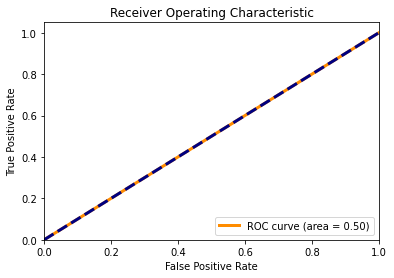

In [ ]:
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
def plot_roc(name, labels, preds):
  fp, tp, _ = sklearn.metrics.roc_curve(test_set.labels, test_preds)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

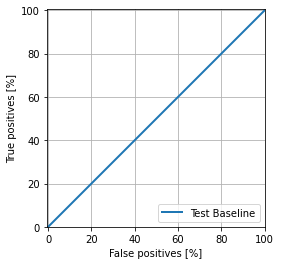

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_set.labels, test_preds)
plt.legend(loc='lower right')

[[94  0]
 [30  0]]


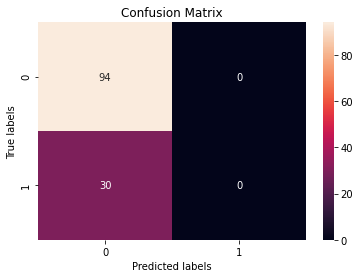

In [ ]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
expected = test_groundtruth_labels
predicted = test_preds
results = confusion_matrix(expected, predicted)
print(results)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(results, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

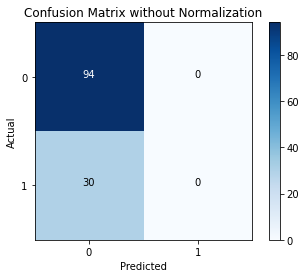

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools

plt.imshow(results,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(test_groundtruth_labels))) # length of classes
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = results.max() / 2.
for i,j in itertools.product(range(results.shape[0]),range(results.shape[1])):
    plt.text(j,i,format(results[i,j],'d'),horizontalalignment='center',color='white' if results[i,j] >thresh else 'black')
plt.show();

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_true = test_set.labels
y_pred = test_preds
precision_recall_fscore_support(test_set.labels, test_preds, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.3790322580645161, 0.5, 0.43119266055045874, None)